<a href="https://colab.research.google.com/github/manasi-sharma26/Colorectal-Cancer/blob/main/Code_Manasi_Sharma_Towards_Precision_Medicine_in_Colorectal_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title # **Run this code cell to set up the notebook!**
# @markdown The data may take some time to load in, so feel free to move on to the next part in the meantime.

project = "histology" # @param ["Choose your dataset!", "bees", "histology", "beans", "malaria"]

import requests
from IPython.display import Markdown, display

import tensorflow_datasets as tfds
from tensorflow.image import resize_with_pad, ResizeMethod

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def ProjectDescription(project):
  display_str =  f"**[{project.capitalize()} Project Background Document]({article_url_dict[project]})** <br />"
  display_str += f"**[{project.capitalize()} Dataset Documentation]({dataset_documentation_url_dict[project]})** <br />"
  display(Markdown(display_str))
  response = requests.get(image_url_dict[project], stream=True)
  img = Image.open(response.raw)
  plt.imshow(img)
  plt.axis('off')
  plt.show()

def plot_metric(history, metric="accuracy", best_is_max=True, start_epoch=0, random_model_metric=None):
  # Get lists of accuracies over the epochs
  training_accuracy = history.history[metric][start_epoch:]
  validation_accuracy = history.history['val_' + metric][start_epoch:]

  # Find best epoch depending on whether max is the best for the metric
  if best_is_max:
    best_epoch = validation_accuracy.index(max(validation_accuracy))
  else:
    best_epoch = validation_accuracy.index(min(validation_accuracy))

  # Plot labels
  plt.title(metric.capitalize() + ' as Model Trains')
  plt.xlabel('Epoch #')
  plt.ylabel(metric.capitalize())

  # Plot lines
  plt.plot(training_accuracy, label='Train')
  plt.plot(validation_accuracy, label='Validation')
  plt.axvline(x=best_epoch, linestyle='--', color='green', label='Best Epoch')

  if random_model_metric is not None:
    plt.axhline(random_model_metric, linestyle='--',color='red', label='Chance')

  # Plot legend and show
  plt.legend()
  plt.show()

# URL dictionaries for the projects
article_url_dict = {
    "beans"     : "https://docs.google.com/document/d/19AcNUO-9F4E9Jtc4bvFslGhyuM5pLxjCqKYV3rUaiCc/edit?usp=sharing",
    "malaria"   : "https://docs.google.com/document/d/1u_iX2oDrEZ1clhFefpP3V8uwAjf7EUV4G6kq_3JDcVY/edit?usp=sharing",
    "histology" : "https://docs.google.com/document/d/162WhUE9KqCgq_I7-VvENZD2n1IVsbeXVRSwfJEkxAqQ/edit?usp=sharing",
    "bees"      : "https://docs.google.com/document/d/1PUB_JuYHi6zyHsWAhkIb7D7ExeB1EfI09arc6Ad1bUY/edit?usp=sharing"
}

image_url_dict = {
    "beans"     : "https://storage.googleapis.com/tfds-data/visualization/fig/beans-0.1.0.png",
    "malaria"   : "https://storage.googleapis.com/tfds-data/visualization/fig/malaria-1.0.0.png",
    "histology" : "https://storage.googleapis.com/tfds-data/visualization/fig/colorectal_histology-2.0.0.png",
    "bees"      : "https://storage.googleapis.com/tfds-data/visualization/fig/bee_dataset-bee_dataset_300-1.0.0.png"
}

download_url_prefix_dict = {
    "histology" : "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Towards%20Precision%20Medicine/",
    "bees"      : "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20Safeguarding%20Bee%20Health/"
}

dataset_documentation_url_dict = {
    "beans"     : "https://www.tensorflow.org/datasets/catalog/beans",
    "malaria"   : "https://www.tensorflow.org/datasets/catalog/malaria",
    "bees"      : "https://www.tensorflow.org/datasets/catalog/bee_dataset",
    "histology" : "https://www.tensorflow.org/datasets/catalog/colorectal_histology",
}

# Load dataset
if project == "Choose your dataset!":
  print("Please choose your dataset from the dropdown menu!")

elif project == "beans":
  data,  info = tfds.load('beans', split='train[:1024]', as_supervised=True, with_info=True)
  feature_dict = info.features['label'].names
  images = np.array([resize_with_pad(image, 128, 128, antialias=True) for image,_ in data]).astype(int)
  labels = [feature_dict[int(label)] for image,label in data]

elif project == "malaria":
  data,  info = tfds.load('malaria', split='train[:1024]', as_supervised=True, with_info=True)
  images = np.array([resize_with_pad(image, 256, 256, antialias=True) for image,_ in data]).astype(np.uint8)
  labels = ['malaria' if label==1 else 'healthy' for image,label in data]

else:
  wget_command = f'wget -q --show-progress "{download_url_prefix_dict[project]}'
  !{wget_command + 'images.npy" '}
  !{wget_command + 'labels.npy" '}

  images = np.load('images.npy')
  labels = np.load('labels.npy')

  !rm images.npy labels.npy


# Original preprocessing code for datasets

# if project == "histology":
#   data,  info = tfds.load('colorectal_histology', split='train[:1024]', as_supervised=True, with_info=True)
#   feature_dict = info.features['label'].names
#   images = np.array([image for image,label in data]).astype(int)
#   labels = [feature_dict[int(label)] for image,label in data]

# if project == "bees":
#   data,  info = tfds.load('bee_dataset', split='train[:3200]', as_supervised=True, with_info=True)
#   data = [(image, label) for image,label in data if label['wasps_output']==0]
#   data1 = [(image, label) for image,label in data if label['varroa_output']==0][:500]
#   data2 = [(image, label) for image,label in data if label['varroa_output']==1][:500]
#   data = data1 + data2
#   images = np.array([image for image, _ in data]).astype(int)
#   labels = ['diseased' if label['varroa_output'] else 'healthy' for image,label in data]

images.npy          100%[===================>] 527.34M   209MB/s    in 2.5s    
labels.npy          100%[===================>]  28.12K  --.-KB/s    in 0s      


In [ ]:
#@title Run this cell to construct your model!
#@markdown Feel free to click "Show code" and edit the model with any improvements you may have made in Notebook 2!
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Conv3D, Flatten

# Using the get_dummies() function to one-hot encode your labels.
labels_ohe = np.array(pd.get_dummies(labels))

# Select your feature (X) and labels (y).
y = labels_ohe
X = images

# Split your data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Initialize your model
cnn_model = Sequential()


# Input layer
cnn_model.add(Input(shape=X_train.shape[1:]))

# First layer
cnn_model.add(Conv2D(8, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# Second layer
cnn_model.add(Conv2D(16, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# Third layer
cnn_model.add(Conv2D(32, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))

# # Fourth layer
cnn_model.add(Conv2D(64, (3,3), activation='relu', padding="same"))
cnn_model.add(MaxPooling2D((2, 2)))


# Flattening layer
cnn_model.add(Flatten())

# Hidden (dense) layer with 32 nodes, and relu activation function.
cnn_model.add(Dense(32, activation='relu'))

# Final output layer that uses a softmax activation function.
cnn_model.add(Dense(len(set(labels)), activation='softmax'))

# Compile your model
metrics_to_track = ['categorical_crossentropy', 'accuracy']
cnn_model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=metrics_to_track)



In [ ]:
### YOUR CODE HERE ###

In [ ]:
### YOUR CODE HERE ###

In [ ]:
one_hot_encoding_to_label_dict = {np.argmax(ohe):label for ohe, label in zip(labels_ohe, labels)}


# This function takes in a vector, and outputs the label.
def ScoreVectorToPredictions(prob_vector):
  class_num = np.argmax(prob_vector) # Find which element in the vector has the highest score.
  class_name = one_hot_encoding_to_label_dict[class_num] # Figure out the label that corresponds to this element.
  return class_name, max(prob_vector) # Return the label as well as the probabilty that the model assigned to this prediction.



### YOUR CODE HERE ###

In [ ]:
### YOUR CODE HERE ###
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 32)        0

Epoch 1/10
26/26 [==============================] - 14s 485ms/step - loss: 12.7873 - categorical_crossentropy: 12.7873 - accuracy: 0.2076 - val_loss: 1.8254 - val_categorical_crossentropy: 1.8254 - val_accuracy: 0.3220
Epoch 2/10
26/26 [==============================] - 12s 470ms/step - loss: 1.8950 - categorical_crossentropy: 1.8950 - accuracy: 0.2759 - val_loss: 2.1185 - val_categorical_crossentropy: 2.1185 - val_accuracy: 0.2146
Epoch 3/10
26/26 [==============================] - 10s 394ms/step - loss: 1.7640 - categorical_crossentropy: 1.7640 - accuracy: 0.3284 - val_loss: 1.9682 - val_categorical_crossentropy: 1.9682 - val_accuracy: 0.2293
Epoch 4/10
26/26 [==============================] - 13s 485ms/step - loss: 1.5959 - categorical_crossentropy: 1.5959 - accuracy: 0.3883 - val_loss: 1.2857 - val_categorical_crossentropy: 1.2857 - val_accuracy: 0.4634
Epoch 5/10
26/26 [==============================] - 12s 474ms/step - loss: 1.3159 - categorical_crossentropy: 1.3159 - accuracy: 0

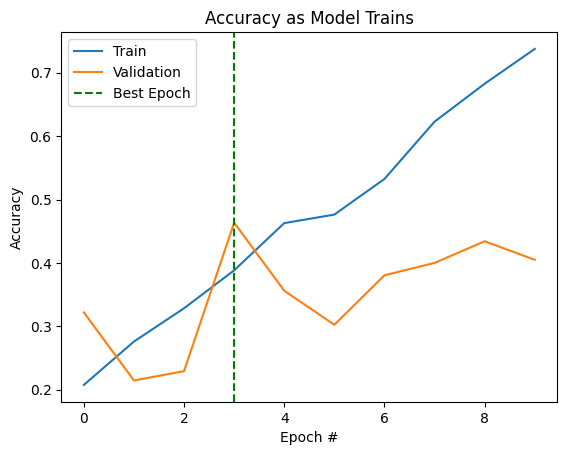

In [ ]:
### YOUR CODE HERE ###
history = cnn_model.fit(X_train, y_train,
                        validation_data=(X_test, y_test), epochs=10)
plot_metric(history)

# PART I: Data Augmentation


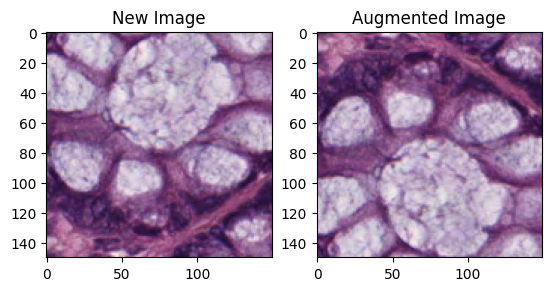

In [ ]:
from numpy import flipud

## A function to create an augmented image from an original.
def createAugmentedImage(original_image):
  new_image = flipud(original_image) ##### YOUR CODE HERE ########
  return new_image

# Transform the first image of your dataset using your new function.
new_image = createAugmentedImage(X_train[0])

# Let's see how your augmented image compares to the original!
# We've filled this part in for you.
f, ax = plt.subplots(ncols=2)
ax[0].imshow(X_train[0])
ax[0].set_title('New Image')
ax[1].imshow(new_image)
ax[1].set_title('Augmented Image')
plt.show()

In [ ]:
### YOUR CODE HERE ###

In [ ]:
for i in range(500):
  new_X = createAugmentedImage(X_train[i]) ### YOUR CODE HERE - What will you do to each image?
  new_y = y_train[i] ### YOUR CODE HERE

  if i == 0:
    X_train_augment = [new_X]
    y_train_augment = [new_y]
  else:
    X_train_augment = np.append(X_train_augment, [new_X], axis=0)
    y_train_augment = np.append(y_train_augment, [new_y], axis=0)


print("Dimensions of augmented X:", X_train_augment.shape)
print("Dimensions of y:", y_train_augment.shape)

Dimensions of augmented X: (500, 150, 150, 3)
Dimensions of y: (500, 8)


Epoch 1/5
16/16 [==============================] - 5s 95ms/step - loss: 20.3368 - categorical_crossentropy: 20.3368 - accuracy: 0.1440 - val_loss: 2.2102 - val_categorical_crossentropy: 2.2102 - val_accuracy: 0.1610
Epoch 2/5
16/16 [==============================] - 0s 23ms/step - loss: 1.9081 - categorical_crossentropy: 1.9081 - accuracy: 0.2480 - val_loss: 1.5857 - val_categorical_crossentropy: 1.5857 - val_accuracy: 0.3463
Epoch 3/5
16/16 [==============================] - 0s 23ms/step - loss: 1.7294 - categorical_crossentropy: 1.7294 - accuracy: 0.2880 - val_loss: 1.4989 - val_categorical_crossentropy: 1.4989 - val_accuracy: 0.3805
Epoch 4/5
16/16 [==============================] - 0s 23ms/step - loss: 1.6454 - categorical_crossentropy: 1.6454 - accuracy: 0.3080 - val_loss: 2.9341 - val_categorical_crossentropy: 2.9341 - val_accuracy: 0.1659
Epoch 5/5
16/16 [==============================] - 0s 26ms/step - loss: 1.6727 - categorical_crossentropy: 1.6727 - accuracy: 0.3260 - val_los

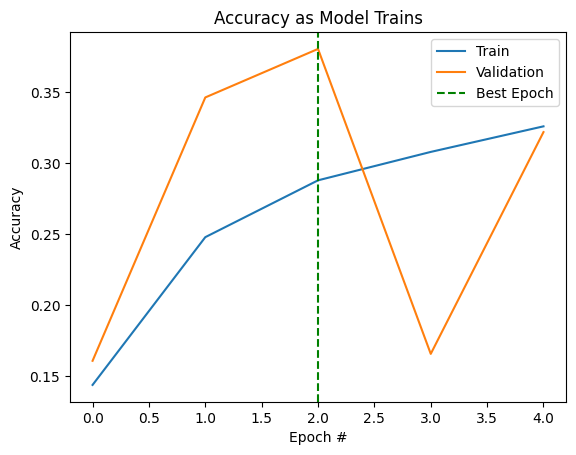

In [ ]:
### YOUR CODE HERE ###
augmented_history = cnn_model.fit(X_train_augment, y_train_augment,
                        validation_data=(X_test, y_test), epochs=5)
plot_metric(augmented_history)


# PART II: Transfer Learning


## 📶 Initialize a pre-trained model

In [ ]:
# Run this cell to import pretrained MobileNet
from keras.applications import MobileNetV2, VGG16
mobile_net = VGG16(include_top=True)
mobile_net.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 🧰 Modifying the output layer size

In [ ]:
from keras import Model


# Make a final layer. Use a Dense() layer, with the size as
# the number of of classes you want to predict!
# Also set the activation function to softmax.
new_output_layer = Dense(len(y_train[0]), activation = 'softmax') ### REPLACE THIS LINE ###


# Rewire the model so that the new output layer
# The syntax here can be a little confusing, so we've helped you out.
output = new_output_layer(mobile_net.layers[-2].output)
input = mobile_net.input
transfer_cnn = Model(input, output)


# print the summary
transfer_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## 🧊 Freezing the weights

In [ ]:
# make all layers untrainable by freezing weights (except for last layer)
for layer in transfer_cnn.layers:
    layer.trainable = False ### YOUR CODE HERE - Make sure all layers are >>>NOT<<<< trainable

## Set the final layer as trainable=True
### YOUR CODE HERE ###
transfer_cnn.layers[-1].trainable = True


# Compile your new model using loss='categorical_crossentropy'
# optimizer='adam' and metrics=['accuracy', 'categorical_crossentropy']
### YOUR CODE HERE ####
transfer_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_crossentropy'])

# Look at the summary of the network to make sure the structure is as you expect!
transfer_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## ✂ Resize your images

In [ ]:
# Takes in an image, a new height, and a new width
# and resizes the image, plus converts from greyscale to 3 RGB color channels.
def ResizeImages(images, height, width):
  return np.array([resize_with_pad(image, height, width, antialias=True) for image in images]).astype(int)

# Resize your image
X_train_resized = ResizeImages(X_train, 224, 224) ### REPLACE THIS LINE
X_test_resized = ResizeImages(X_test, 224, 224) ### REPLACE THIS LINE

# Make sure your images are the right dimensions
print("Dim X_train_resized:", X_train_resized.shape)
print("Dim X_test_resized:", X_test_resized.shape)

Dim X_train_resized: (819, 224, 224, 3)
Dim X_test_resized: (205, 224, 224, 3)


## 💅 Finetune the model using your data

Epoch 1/3
26/26 [==============================] - 24s 584ms/step - loss: 1.0280 - accuracy: 0.6532 - categorical_crossentropy: 1.0280 - val_loss: 0.6373 - val_accuracy: 0.7805 - val_categorical_crossentropy: 0.6373
Epoch 2/3
26/26 [==============================] - 5s 192ms/step - loss: 0.3790 - accuracy: 0.8718 - categorical_crossentropy: 0.3790 - val_loss: 0.5648 - val_accuracy: 0.8098 - val_categorical_crossentropy: 0.5648
Epoch 3/3
26/26 [==============================] - 5s 179ms/step - loss: 0.2515 - accuracy: 0.9182 - categorical_crossentropy: 0.2515 - val_loss: 0.5171 - val_accuracy: 0.8341 - val_categorical_crossentropy: 0.5171


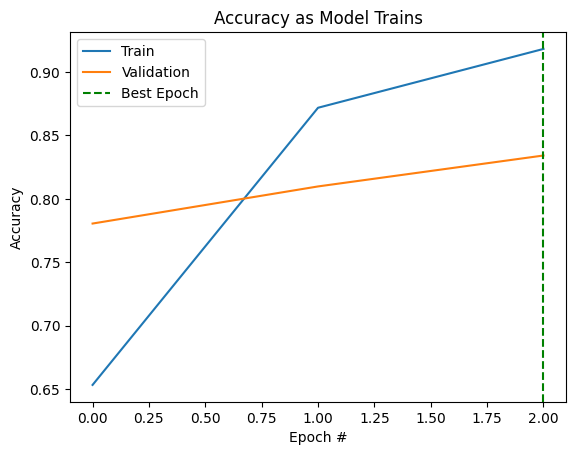

In [ ]:
### YOUR CODE HERE ###
transfer_history = transfer_cnn.fit(X_train_resized, y_train, validation_data=[X_test_resized, y_test], epochs = 3)
plot_metric(transfer_history)